In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/housing.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from pyearth import Earth
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
import xgboost

from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('/kaggle/input/boston-housing-dataset/housing.csv')
print('The shape of dataset: ', df.shape)
df.head()

The shape of dataset:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


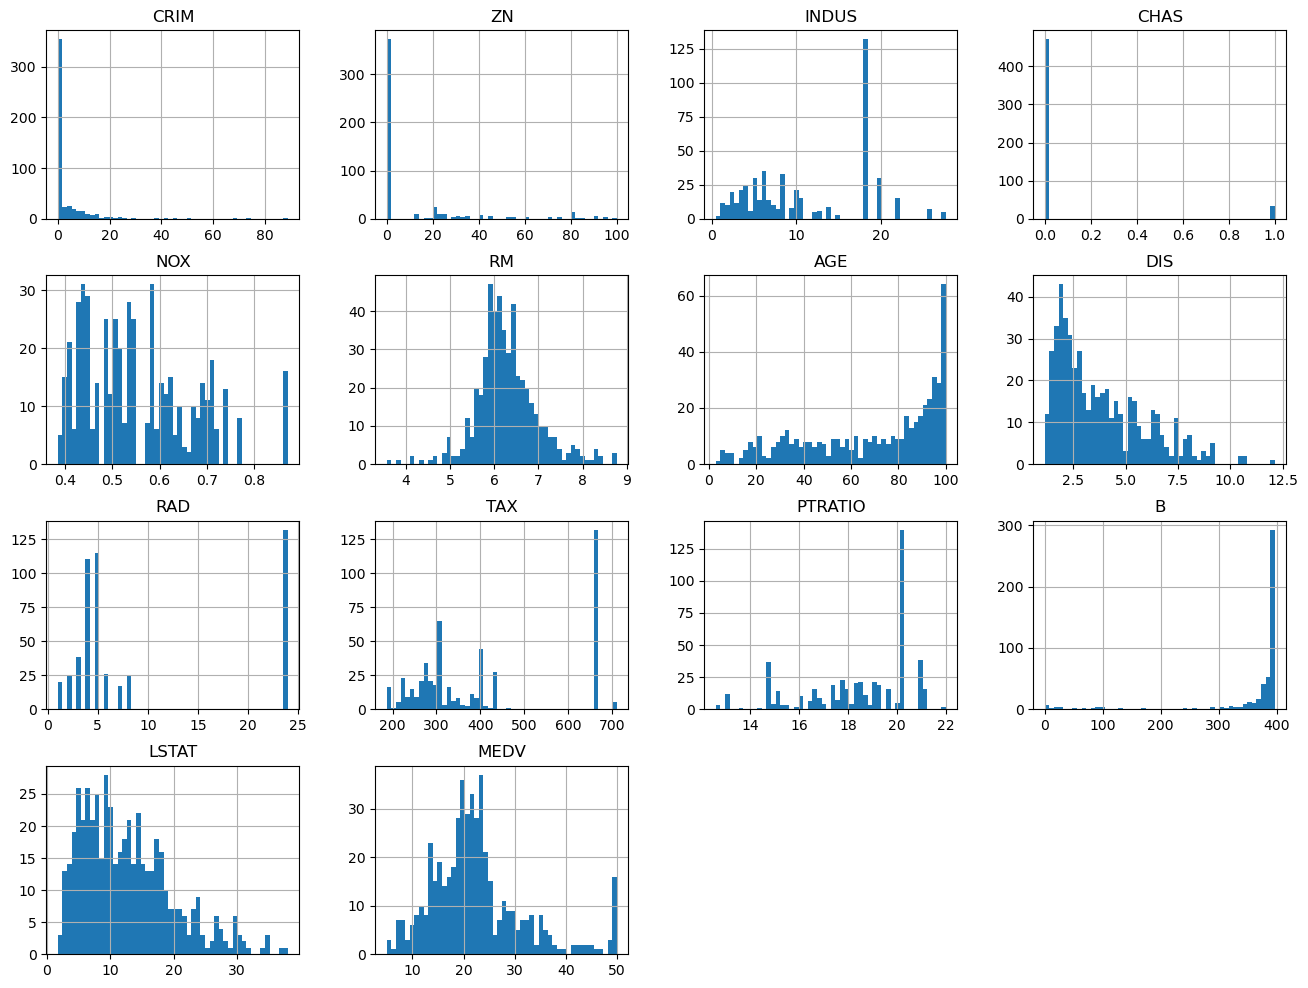

In [7]:
# Visualize each variable's distribution
df.hist(bins=50, figsize=(16,12))
plt.rcParams['figure.figsize'] = [8, 4]
plt.show()

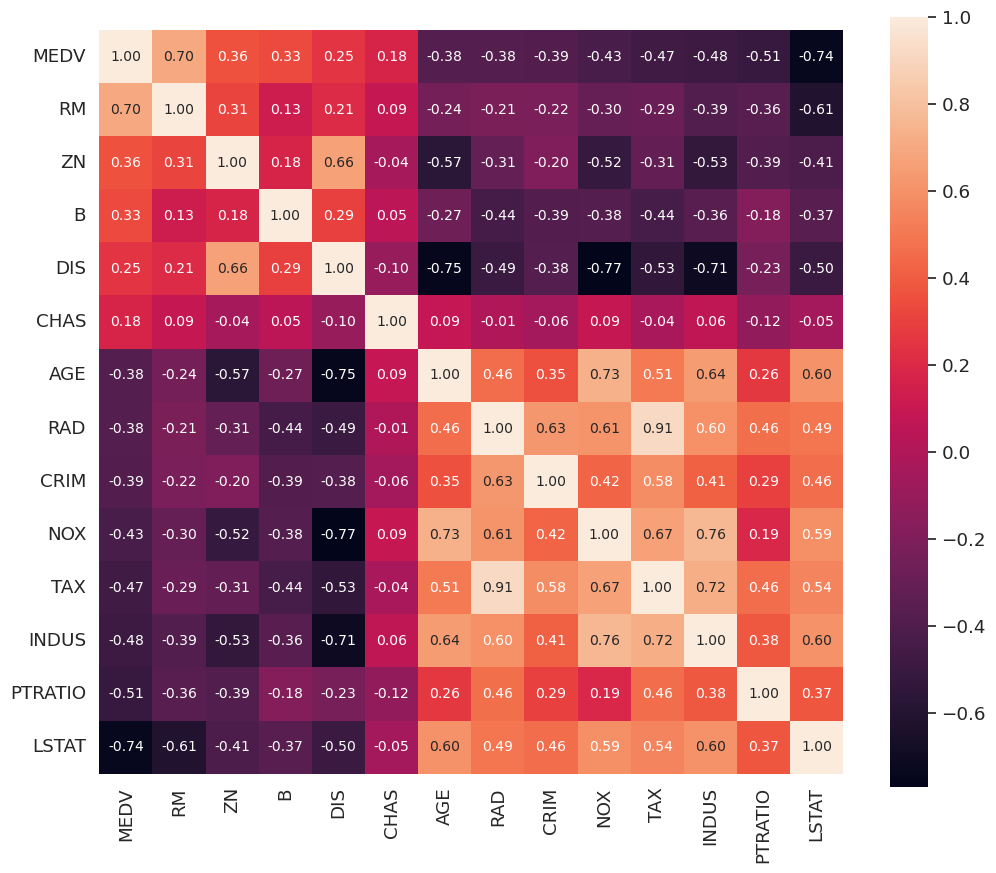

In [9]:
k = 14 
corrmat = df.corr()
cols = corrmat.nlargest(k, "MEDV")["MEDV"].index
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

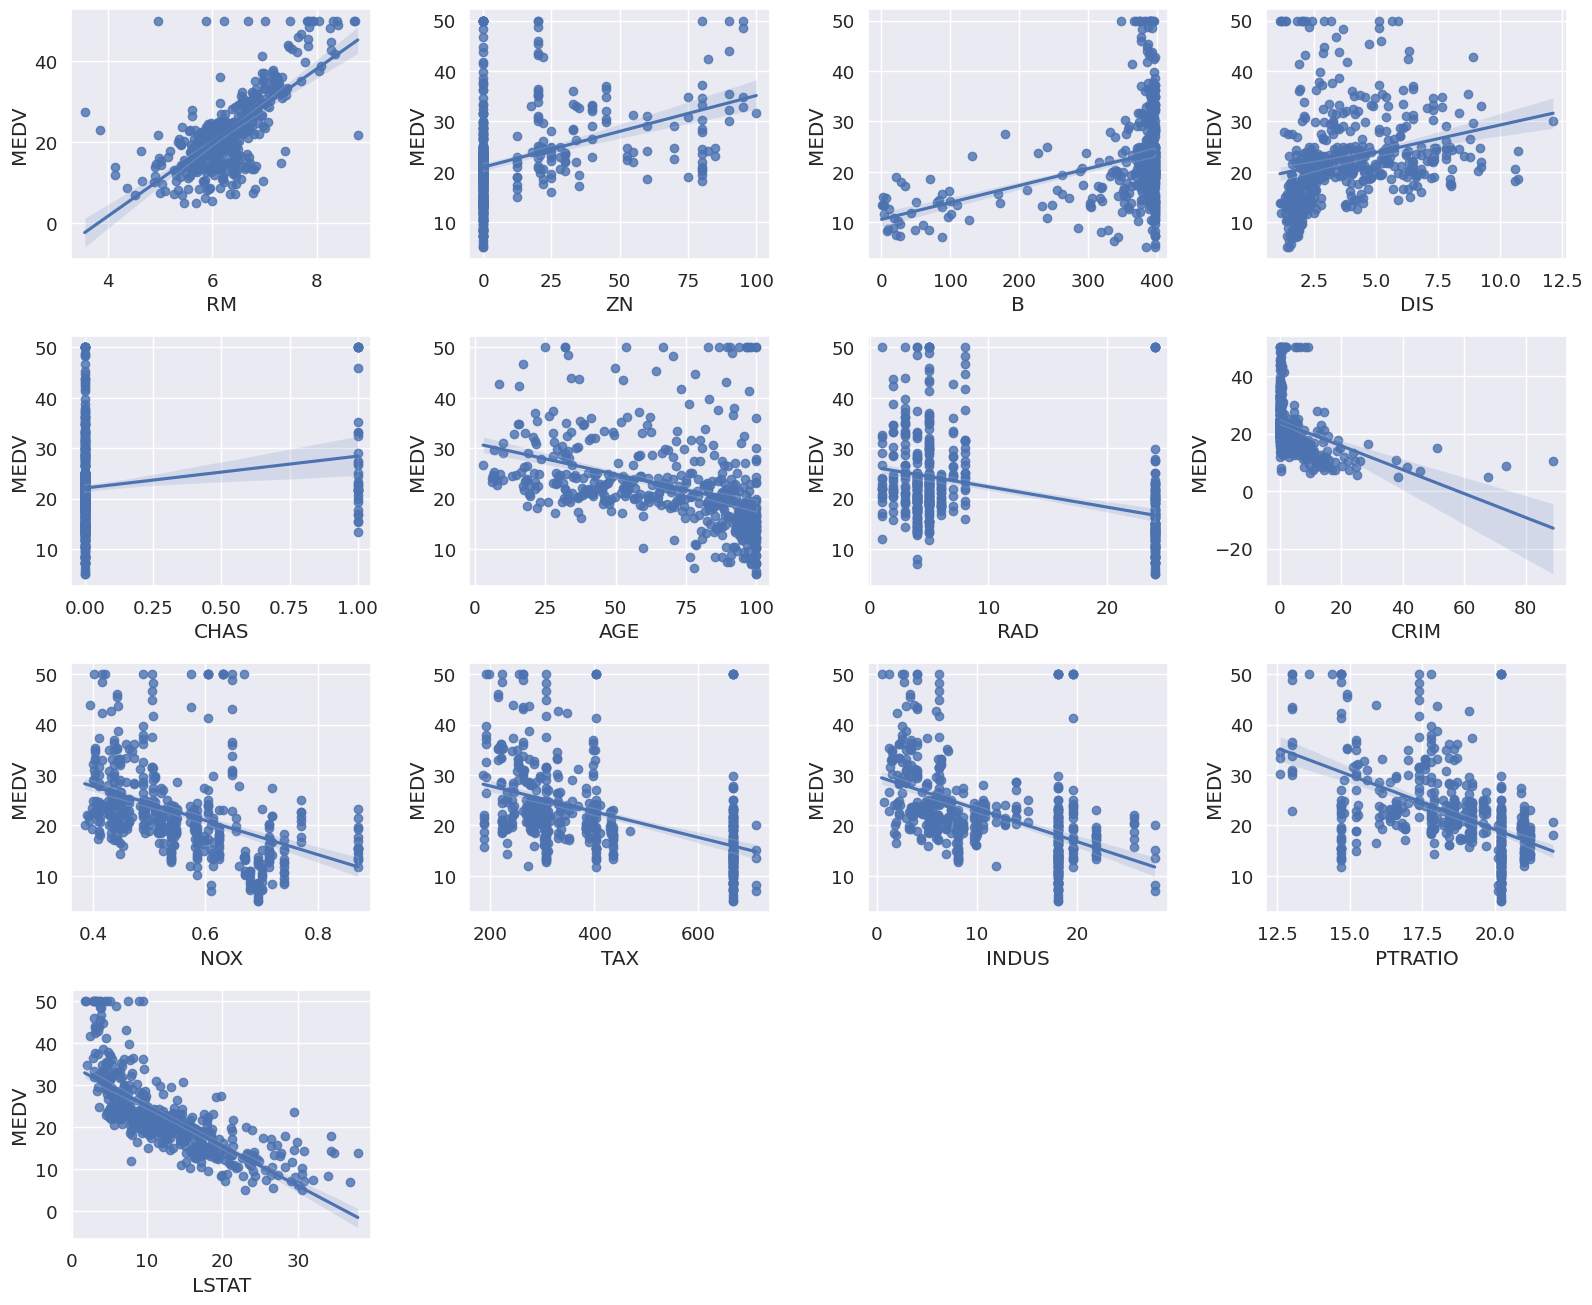

In [10]:
#visualize regression between each feature and the target ("MEDV")
k=14
fig = plt.figure(figsize=(16,16))
# Correlations between each variable

corrmat = df.corr()

# Take k elements in descending order of coefficient 
cols = corrmat.nlargest(k, "MEDV")["MEDV"].index

# Calculate correlation
for i in np.arange(1,k):
    X_train = df[cols[i]]
    ax = fig.add_subplot(5,4,i)
    sns.regplot(x=X_train, y=df['MEDV'])
plt.tight_layout()
plt.show()

# #**Data preparation**

In [11]:
# Create X and y
X = df.drop('MEDV', axis=1).values
y = df['MEDV'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('x_train and x_test shapes are {} and {}'.format(X_train.shape, X_test.shape))
print('y_train and y_test shapes are {} and {}'.format(y_train.shape, y_test.shape))

x_train and x_test shapes are (404, 13) and (102, 13)
y_train and y_test shapes are (404,) and (102,)


In [13]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 
# **Linear regression**

In [14]:
# Initiate the model
reg = LinearRegression()

# Fit the model
reg.fit(X_train, y_train)

# Cross validation
reg_cv_results_train = cross_val_score(reg, X_train, y_train, cv=5)
print("Linear Regression (Train): ", np.mean(reg_cv_results_train))

reg_cv_results_test = cross_val_score(reg, X_test, y_test, cv=5)
print("Linear Regression (Test): ", np.mean(reg_cv_results_test))

Linear Regression (Train):  0.7244357342240262
Linear Regression (Test):  0.5451790940964922


# **Ridge regression**

In [18]:
# Initiate model
ridge = Ridge(alpha=0.1, normalize=True)

# Fit the model
ridge.fit(X_train, y_train)

# Cross validation
ridge_cv_results_train = cross_val_score(ridge, X_train, y_train, cv=5)
print("Ridge Regression (Train): ", np.mean(ridge_cv_results_train))

ridge_cv_results_test = cross_val_score(ridge, X_test, y_test, cv=5)
print("Ridge Regression (Test): ", np.mean(ridge_cv_results_test))

Ridge Regression (Train):  0.7201084129797386
Ridge Regression (Test):  0.5987389534019599


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

# **lasso reg**

In [19]:
# Initiate model
lasso = Lasso(alpha=0.1, normalize=True)

# Fit the model
lasso.fit(X_train, y_train)

# Cross validation
lasso_cv_results_train = cross_val_score(lasso, X_train, y_train, cv=5)
print("Lasso Regression (Train): ", np.mean(lasso_cv_results_train))

lasso_cv_results_test = cross_val_score(lasso, X_test, y_test, cv=5)
print("Lasso Regression (Test): ", np.mean(lasso_cv_results_test))


Lasso Regression (Train):  0.6081153029704334
Lasso Regression (Test):  0.5532502198179508


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

# **Multivariate Adaptive Regression Splines (MARS)**

In [20]:
# Initiate model
mars = Earth()

# Fit the model
mars.fit(X_train, y_train)

# Cross validation
mars_cv_results_train = cross_val_score(mars, X_train, y_train, cv=5)
print("MARS (Train): ", np.mean(mars_cv_results_train))

mars_cv_results_test = cross_val_score(mars, X_test, y_test, cv=5)
print("MARS (Test): ", np.mean(mars_cv_results_test))

/opt/conda/lib/python3.7/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/opt/conda/lib/python3.7/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/opt/conda/lib/python3.7/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future defau

MARS (Train):  0.8180308139710484


/opt/conda/lib/python3.7/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/opt/conda/lib/python3.7/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/opt/conda/lib/python3.7/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future defa

MARS (Test):  0.36404963188111933


/opt/conda/lib/python3.7/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/opt/conda/lib/python3.7/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/opt/conda/lib/python3.7/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future defa

# **Decision tree**

In [21]:
# Initiate model
dt = DecisionTreeRegressor()

# Fit the model
dt.fit(X_train, y_train)

# Cross validation
dt_cv_results_train = cross_val_score(dt, X_train, y_train, cv=5)
print("Decision Tree (Train): ", np.mean(dt_cv_results_train))

dt_cv_results_test = cross_val_score(dt, X_test, y_test, cv=5)
print("Decision Tree (Test): ", np.mean(dt_cv_results_test))

Decision Tree (Train):  0.6628428589916372
Decision Tree (Test):  0.6094929733925459


# **Random Forest**

In [22]:
# Initiate model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X_train, y_train)

# Cross validation
rf_cv_results_train = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest (Train): ", np.mean(rf_cv_results_train))

rf_cv_results_test = cross_val_score(rf, X_test, y_test, cv=5)
print("Random Forest (Test): ", np.mean(rf_cv_results_test))

Random Forest (Train):  0.827202751475428
Random Forest (Test):  0.7120496686437268


# **Xgboost**

In [30]:
# Initiate model
xgb = XGBRegressor()

# Fit the model
xgb.fit(X_train, y_train)

# Cross validation
xgb_cv_results_train = cross_val_score(xgb, X_train, y_train, cv=5)
print("XGBoost (Train): ", np.mean(xgb_cv_results_train))

xgb_cv_results_test = cross_val_score(xgb, X_test, y_test, cv=5)
print("XGBoost (Test): ", np.mean(xgb_cv_results_test))

XGBoost (Train):  0.8426447064853209
XGBoost (Test):  0.7174592806658263


# KNN

In [27]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train,y_train)

print('KNN_train', knn.score(X_train,y_train))

print('KNN_test', knn.score(X_test,y_test))


KNN_test 0.9088152869217375
KNN_test 0.7353977906290499


In [28]:
from sklearn.svm import SVR
from sklearn.metrics.pairwise import polynomial_kernel

svr = SVR(kernel = polynomial_kernel)
svr.fit(X_train,y_train)


print('SVR_train', svr.score(X_train,y_train))
print('SVR_test', svr.score(X_test,y_test))


KNN_train 0.8912926768574054
KNN_test 0.8357650946127497


In [31]:
accuray_dict = {"linear_reg":np.mean(reg_cv_results_train ) ,
                "ridge_reg" :np.mean(ridge_cv_results_train) ,
                "lasso_reg" :np.mean(lasso_cv_results_train) ,
                "MARS" : np.mean(mars_cv_results_train) ,
                "Decision_Tree" : np.mean(dt_cv_results_train) ,
                "Random_Forest" : np.mean(rf_cv_results_train) ,
                "XGboost" : np.mean(xgb_cv_results_train) ,
                "KNN" : knn.score(X_train,y_train),
                "SVR" : svr.score(X_train,y_train)
               }

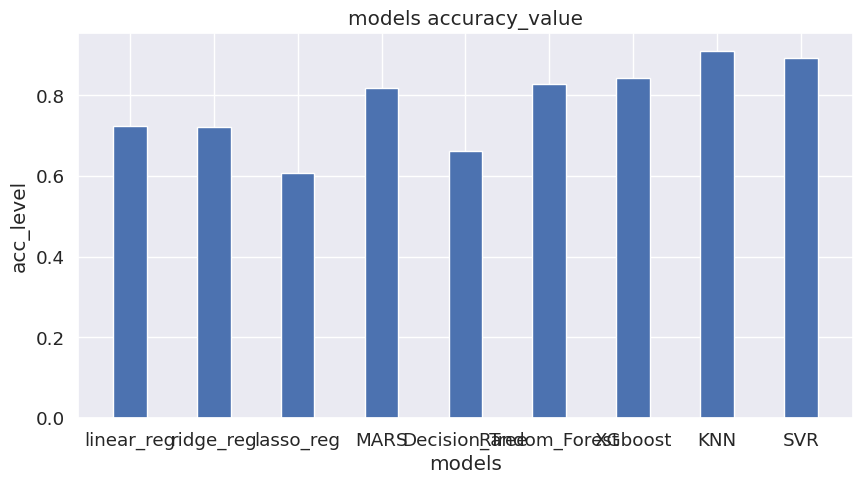

In [32]:
models = list(accuray_dict.keys())
acc= list(accuray_dict.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, acc, 
        width = 0.4)
 
plt.xlabel("models")
plt.ylabel("acc_level")
plt.title("models accuracy_value")
plt.show()